In [58]:
import numpy as np
import pandas as pd
import requests as rq 
import time
from bs4 import BeautifulSoup as beautS
from requests_html import HTMLSession
import json

In [56]:
df_infa = []
for p in range(1, 400):
    time.sleep(3)
    url = f'https://www.sravni.ru/proxy-reviews/reviews?filterBy=withRates&fingerPrint=7553e7372907a64c8b8844df9c01e83d&isClient=false&locationRoute=&newIds=true&orderBy=byDate&pageIndex={p}&pageSize=10&reviewObjectId=5bb4f767245bc22a520a5fd5&reviewObjectType=bank&specificProductId=&tag=&withVotes=true'
    session = HTMLSession()
    links = session.get(url)
    page_10 = json.loads(links.html.html)
    page_11 = page_10.get('items', 0)
    for receive in page_11:
        X = [receive['rating'],receive['date'],receive['problemSolved'],receive['hasCompanyResponse']]
        df_infa.append(X)
df_infa.append(df_infa)

[[5, '2022-11-08T13:13:33.92215Z', False, True], [5, '2022-11-08T13:13:14.063968Z', False, True], [5, '2022-11-08T12:58:18.086475Z', False, True], [5, '2022-11-08T12:58:15.533294Z', False, True], [5, '2022-11-08T12:49:59.086837Z', False, True], [5, '2022-11-08T12:38:57.018636Z', False, True], [5, '2022-11-08T12:19:09.331491Z', False, True], [5, '2022-11-08T10:35:09.668063Z', False, True], [5, '2022-11-08T09:51:59.349936Z', False, True], [5, '2022-11-08T08:57:33.528713Z', False, True], [5, '2022-11-08T08:10:24.069176Z', False, True], [5, '2022-11-08T08:04:48.737265Z', False, True], [5, '2022-11-08T08:02:24.651272Z', False, True], [4, '2022-11-08T07:10:52.70469Z', False, True], [3, '2022-11-08T04:34:23.812917Z', False, True], [5, '2022-11-08T03:39:31.410382Z', False, True], [5, '2022-11-07T20:11:35.994567Z', False, True], [5, '2022-11-07T19:44:25.338781Z', False, True], [5, '2022-11-07T19:25:35.367989Z', False, True], [5, '2022-11-07T18:33:22.299941Z', False, True], [5, '2022-11-07T18:27

In [ ]:
import csv
with open('receives1.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for item in df_infa:
        csv_writer.writerow([item])

In [1]:
import numpy as np
import pandas as pd
import requests as rq 
import time
from bs4 import BeautifulSoup as beautS
from requests_html import HTMLSession
import json

In [20]:
df=pd.read_csv("C:/Users/Ilia/Desktop/Python/infa.csv")
df.columns = ['Rate', 'Time', 'Solved', 'Answer']

In [21]:
df

,Rate,Time,Solved,Answer
0,[5,'2023-01-27T17:36:02.789152Z',False,False]
1,[5,'2023-01-27T13:29:46.915021Z',False,False]
2,[5,'2023-01-27T12:00:20.886354Z',False,False]
3,[5,'2023-01-27T09:54:59.132155Z',False,False]
4,[5,'2023-01-27T09:44:30.375147Z',False,False]
...,...,...,...,...
3974,[5,'2022-10-05T04:47:48.237571Z',False,True]
3975,[5,'2022-10-05T04:46:56.604264Z',False,True]
3976,[5,'2022-10-05T04:46:36.553169Z',False,True]
3977,[5,'2022-10-05T04:46:22.213838Z',False,True]


In [23]:
for i in range(len(df)):
    if df.loc[i,'Answer'] == ' True]': df.loc[i,'Answer'] = int(1)
    else: df.loc[i,'Answer'] = int(0)
    df.loc[i,'Rate'] = int(df.loc[i,'Rate'].replace('[',''))
    if df.loc[i,'Solved'] == ' True': df.loc[i,'Solved'] = int(1)
    else: df.loc[i,'Solved'] = int(0)
    df.loc[i,'Time'] = pd.to_datetime(df.loc[i,'Time'][2:12])

df = df.groupby(['Time'], as_index = False).agg(
                RateDaily=('Rate', 'mean'), 
                SolvedDaily=('Solved', 'sum'), 
                AnswerDaily=('Answer', 'sum')
)

df.to_csv('dataset.csv')

In [24]:
df

,Time,RateDaily,SolvedDaily,AnswerDaily
0,2022-10-05,4.937951,0,693
1,2022-10-06,4.831461,1,89
2,2022-10-07,4.964286,0,56
3,2022-10-08,4.975000,0,40
4,2022-10-09,4.892857,0,28
...,...,...,...,...
110,2023-01-23,4.961538,0,1
111,2023-01-24,4.878788,0,3
112,2023-01-25,5.000000,0,0
113,2023-01-26,4.850000,0,4


In [26]:
df.dtypes

Time           datetime64[ns]
RateDaily             float64
SolvedDaily            object
AnswerDaily            object
dtype: object

In [25]:
df.shape

(115, 4)

In [27]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d')

<AxesSubplot:xlabel='Time'>

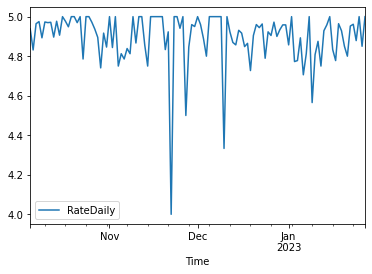

In [28]:
df.plot('Time', 'RateDaily')

In [29]:
df['dfrate'] = df.RateDaily.rolling(7).mean()

<AxesSubplot:xlabel='Time'>

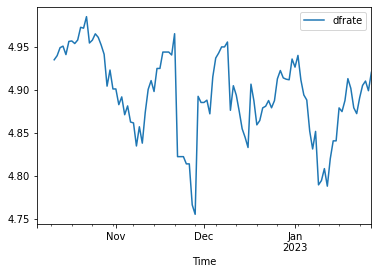

In [30]:
df.plot('Time', 'dfrate')

In [31]:
df.head()

,Time,RateDaily,SolvedDaily,AnswerDaily,dfrate
0,2022-10-05,4.937951,0,693,NaN
1,2022-10-06,4.831461,1,89,NaN
2,2022-10-07,4.964286,0,56,NaN
3,2022-10-08,4.975000,0,40,NaN
4,2022-10-09,4.892857,0,28,NaN


In [32]:
df['dfrate'] = df['dfrate'].fillna(0)

In [34]:
df.head(20)

,Time,RateDaily,SolvedDaily,AnswerDaily,dfrate
0,2022-10-05,4.937951,0,693,0.000000
1,2022-10-06,4.831461,1,89,0.000000
2,2022-10-07,4.964286,0,56,0.000000
3,2022-10-08,4.975000,0,40,0.000000
4,2022-10-09,4.892857,0,28,0.000000
5,2022-10-10,4.972973,0,37,0.000000
6,2022-10-11,4.969697,0,33,4.934889
7,2022-10-12,4.971429,0,35,4.939672
8,2022-10-13,4.896552,0,29,4.948970
9,2022-10-14,4.976744,0,43,4.950750


In [35]:
df_train = df[:-15]
df_test = df[-15:]

In [36]:
df_train.shape

(100, 5)

In [37]:
df_test.shape

(15, 5)

In [39]:
X_train = df_train.drop(['RateDaily', 'Time'], axis=1)
y_train = df_train['RateDaily']
X_test = df_test.drop(['RateDaily', 'Time'], axis=1)
y_test = df_test['RateDaily']

In [40]:
X_train.head()

,SolvedDaily,AnswerDaily,dfrate
0,0,693,0.0
1,1,89,0.0
2,0,56,0.0
3,0,40,0.0
4,0,28,0.0


In [42]:
y_train.head(20)

0     4.937951
1     4.831461
2     4.964286
3     4.975000
4     4.892857
5     4.972973
6     4.969697
7     4.971429
8     4.896552
9     4.976744
10    4.906250
11    5.000000
12    4.976744
13    4.948718
14    5.000000
15    5.000000
16    4.969697
17    5.000000
18    4.785714
19    5.000000
Name: RateDaily, dtype: float64

In [43]:
X_train.isnull().mean()

SolvedDaily    0.0
AnswerDaily    0.0
dfrate         0.0
dtype: float64

In [47]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [48]:
print(lr.intercept_)
print(lr.coef_)

4.9206135908498485
[-0.14052841  0.00014233 -0.00384678]


In [49]:
prediction = lr.predict(X_test)

In [50]:
print('Actual values:', list(y_test.values))
print('Predictions:', prediction)

Actual values: [4.928571428571429, 4.958333333333333, 5.0, 4.833333333333333, 4.777777777777778, 4.964285714285714, 4.928571428571429, 4.85, 4.8, 4.9523809523809526, 4.961538461538462, 4.878787878787879, 5.0, 4.85, 5.0]
Predictions: [4.90605779 4.90526602 4.90455438 4.90611496 4.90442348 4.90579768
 4.90370698 4.90460412 4.90397949 4.90485962 4.90194264 4.90217179
 4.90172518 4.90233766 4.90310919]


In [51]:
prediction

array([4.90605779, 4.90526602, 4.90455438, 4.90611496, 4.90442348,
       4.90579768, 4.90370698, 4.90460412, 4.90397949, 4.90485962,
       4.90194264, 4.90217179, 4.90172518, 4.90233766, 4.90310919])

In [52]:
y_test

100    4.928571
101    4.958333
102    5.000000
103    4.833333
104    4.777778
105    4.964286
106    4.928571
107    4.850000
108    4.800000
109    4.952381
110    4.961538
111    4.878788
112    5.000000
113    4.850000
114    5.000000
Name: RateDaily, dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(list(y_test.values), prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(list(y_test.values), prediction))

Mean squared error: 0.01
Coefficient of determination: -0.02


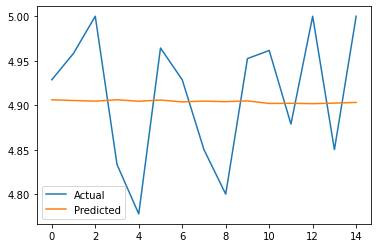

In [56]:
plt.plot(list(y_test.values), label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()

In [13]:
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [14]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import plotly.express as go

In [15]:
dfrate = df.RateDaily.rolling(7).mean()

<AxesSubplot:xlabel='Time'>

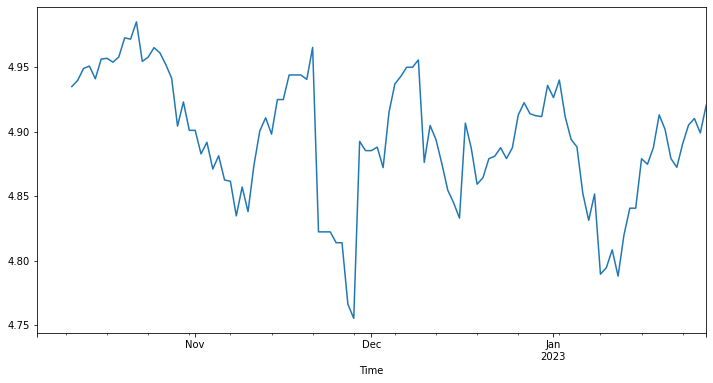

In [16]:
dfrate.plot(figsize=(12,6))

In [61]:
dfrate.head(20)

Time
2022-10-05         NaN
2022-10-06         NaN
2022-10-07         NaN
2022-10-08         NaN
2022-10-09         NaN
2022-10-10         NaN
2022-10-11    4.934889
2022-10-12    4.939672
2022-10-13    4.948970
2022-10-14    4.950750
2022-10-15    4.940929
2022-10-16    4.956235
2022-10-17    4.956774
2022-10-18    4.953777
2022-10-19    4.957858
2022-10-20    4.972637
2022-10-21    4.971630
2022-10-22    4.985023
2022-10-23    4.954410
2022-10-24    4.957733
Name: RateDaily, dtype: float64

In [69]:
dfrate = dfrate.drop(index = ['2022-10-09','2022-10-10' ],axis = 0)

In [70]:
dfrate

Time
2022-10-11    4.934889
2022-10-12    4.939672
2022-10-13    4.948970
2022-10-14    4.950750
2022-10-15    4.940929
                ...   
2023-01-23    4.890651
2023-01-24    4.905081
2023-01-25    4.910183
2023-01-26    4.898958
2023-01-27    4.920387
Name: RateDaily, Length: 109, dtype: float64

In [71]:
dfrate = pd.DataFrame(dfrate)

<AxesSubplot:xlabel='Time'>

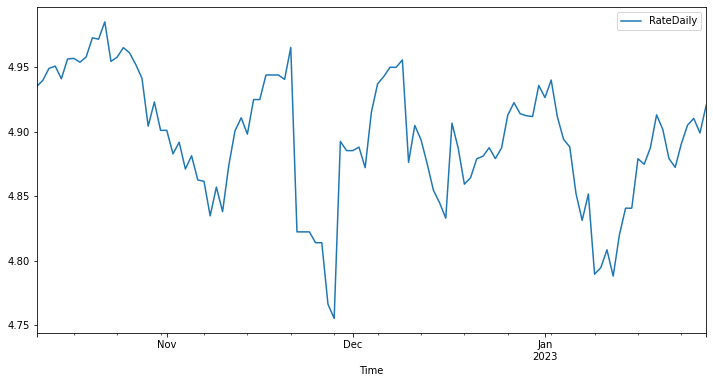

In [72]:
dfrate.plot(figsize=(12,6))

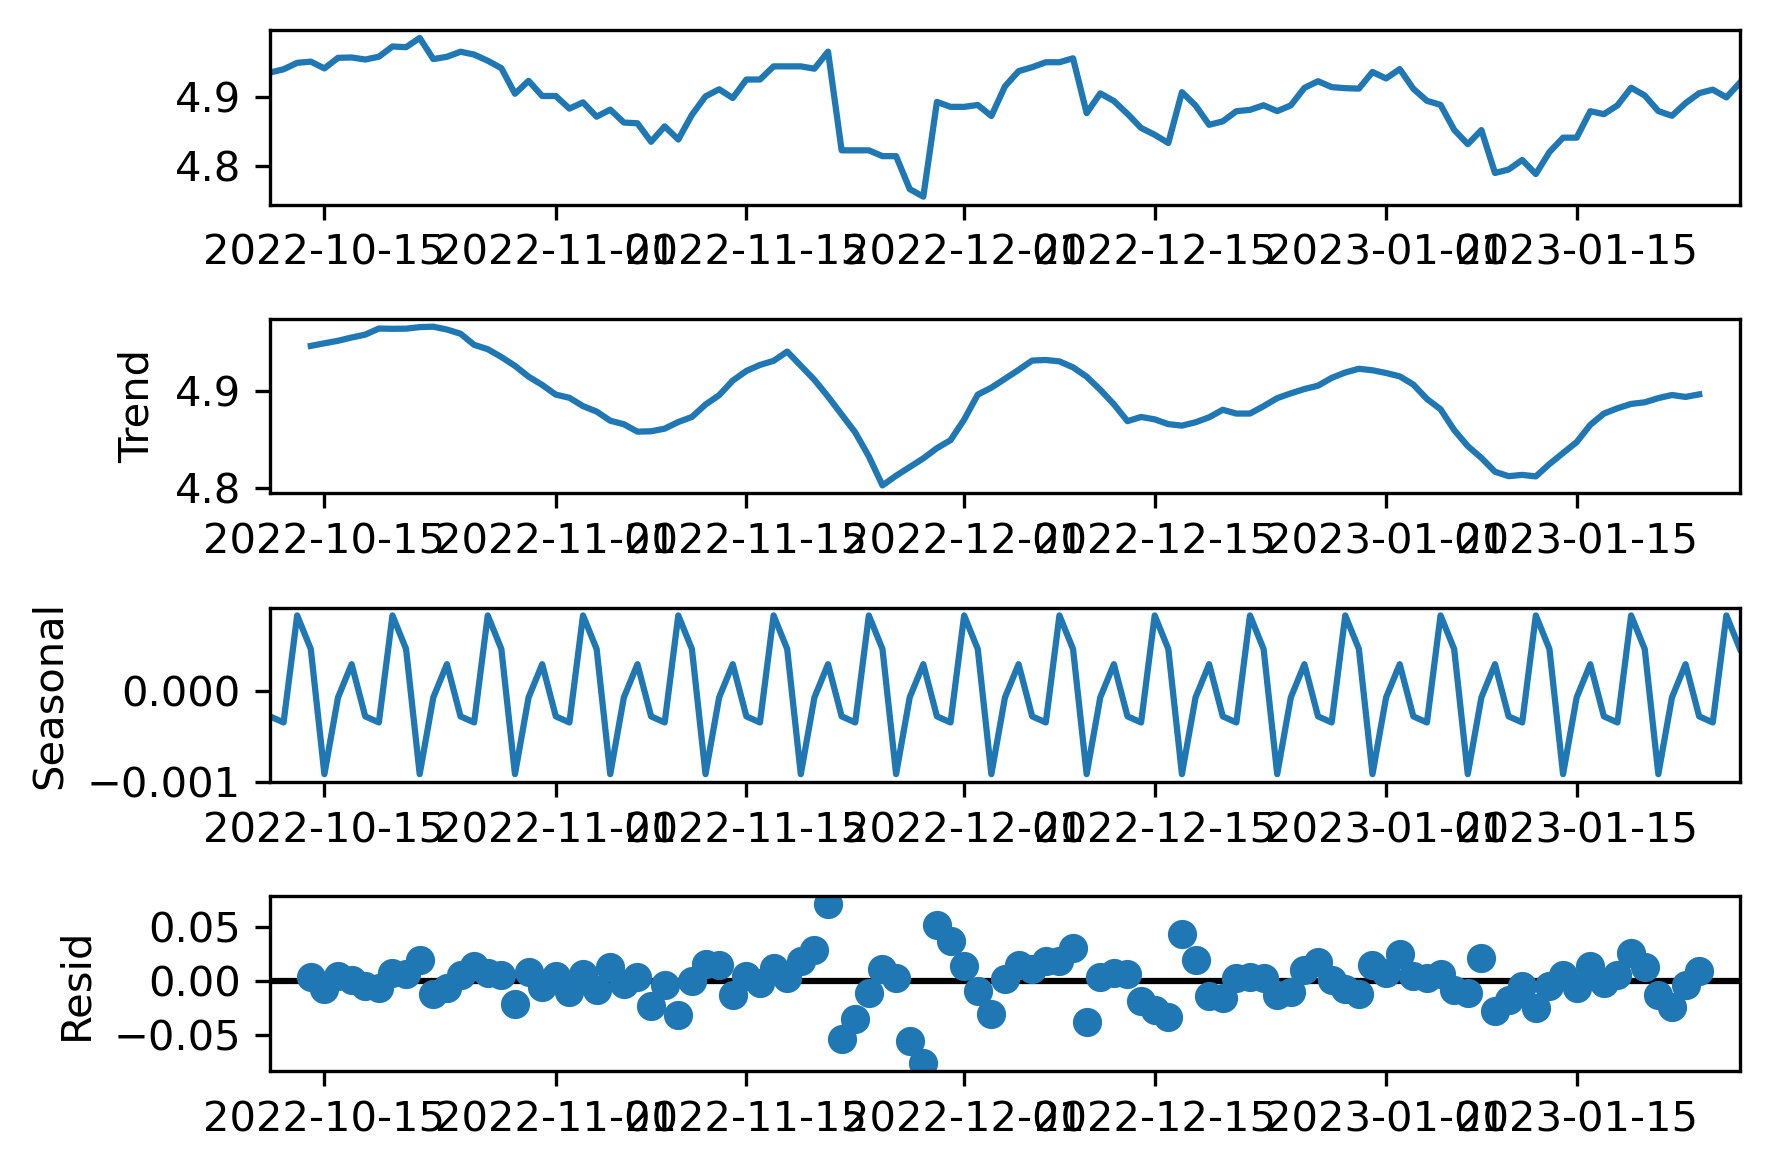

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfrate)
result.plot()

plt.show()

In [75]:
mpl.rcParams['figure.dpi'] = 300

In [80]:
import xgboost as xgb

In [45]:
from sklearn.linear_model import LinearRegression

In [95]:
dfrate

,RateDaily
Time,
2022-10-11,4.934889
2022-10-12,4.939672
2022-10-13,4.948970
2022-10-14,4.950750
2022-10-15,4.940929
...,...
2023-01-23,4.890651
2023-01-24,4.905081
2023-01-25,4.910183


In [88]:
X_train = dfrate.drop(['RateDaily'], axis=1)
y_train = dfrate['RateDaily']

In [89]:
y_train

Time
2022-10-11    4.934889
2022-10-12    4.939672
2022-10-13    4.948970
2022-10-14    4.950750
2022-10-15    4.940929
                ...   
2023-01-23    4.890651
2023-01-24    4.905081
2023-01-25    4.910183
2023-01-26    4.898958
2023-01-27    4.920387
Name: RateDaily, Length: 109, dtype: float64

In [90]:
X_train

""
Time
2022-10-11
2022-10-12
2022-10-13
2022-10-14
2022-10-15
...
2023-01-23
2023-01-24
2023-01-25


In [397]:
for i in range (18):
    dfrate = dfrate.drop(labels = [i],axis = 0)

In [389]:
dfrate = dfrate.drop(labels = [0,1,2,3],axis = 0)

In [398]:
dfrate

18     4.954721
19     4.956703
20     4.959939
21     4.961205
22     4.961947
         ...   
110    4.866858
111    4.873364
112    4.878799
113    4.883126
114    4.890023
Name: RateDaily, Length: 97, dtype: float64

In [402]:
dftime

18    2022-10-23
19    2022-10-24
20    2022-10-25
21    2022-10-26
22    2022-10-27
         ...    
110   2023-01-23
111   2023-01-24
112   2023-01-25
113   2023-01-26
114   2023-01-27
Name: Time, Length: 97, dtype: datetime64[ns]

In [401]:
for i in range (18):
    dftime = dftime.drop(labels = [i],axis = 0)


In [ ]:
from datetime import timedelta
TimeLr = timedelta(days=31)
print(TimeLr)

In [405]:
Time_1 = pd.date_range(df['Time'][114], df['Time'][114]+TimeLr)
Time_Lr = pd.DataFrame(Time_1)

In [413]:
Time_0

,Time
18,2022-10-23
19,2022-10-24
20,2022-10-25
21,2022-10-26
22,2022-10-27
...,...
110,2023-01-23
111,2023-01-24
112,2023-01-25
113,2023-01-26


In [419]:
model

LinearRegression()

In [313]:
Time_Lr

,0
0,2023-01-27
1,2023-01-28
2,2023-01-29
3,2023-01-30
4,2023-01-31
5,2023-02-01
6,2023-02-02
7,2023-02-03
8,2023-02-04
9,2023-02-05
